In [1]:
import pandas as pd

In [2]:
audible_csv = "audible_uncleaned.csv"
df = pd.read_csv(audible_csv)

In [3]:
print("Info:")
print(df.info())

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         87489 non-null  object
 1   author       87489 non-null  object
 2   narrator     87489 non-null  object
 3   time         87489 non-null  object
 4   releasedate  87489 non-null  object
 5   language     87489 non-null  object
 6   stars        87489 non-null  object
 7   price        87489 non-null  object
dtypes: object(8)
memory usage: 5.3+ MB
None


In [4]:
df.head(10)

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00
5,The Hunger Games: Special Edition,Writtenby:SuzanneCollins,Narratedby:TatianaMaslany,10 hrs and 35 mins,30-10-18,English,5 out of 5 stars72 ratings,656.00
6,Quest for the Diamond Sword,Writtenby:WinterMorgan,Narratedby:LukeDaniels,2 hrs and 23 mins,25-11-14,English,5 out of 5 stars11 ratings,233.00
7,The Dark Prophecy,Writtenby:RickRiordan,Narratedby:RobbieDaymond,12 hrs and 32 mins,02-05-17,English,5 out of 5 stars50 ratings,820.00
8,Merlin Mission Collection,Writtenby:MaryPopeOsborne,Narratedby:MaryPopeOsborne,10 hrs and 56 mins,02-05-17,English,5 out of 5 stars5 ratings,"1,256.00"
9,The Tyrant’s Tomb,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 22 mins,24-09-19,English,5 out of 5 stars58 ratings,820.00


In [5]:
duplicate_rows = df.duplicated().sum()
print(f"Duplicate rows: {duplicate_rows}")


Duplicate rows: 0


In [6]:
df['releasedate'] = pd.to_datetime(df['releasedate'], errors='coerce')

C:\Users\User\AppData\Local\Temp\ipykernel_2612\925497503.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['releasedate'] = pd.to_datetime(df['releasedate'], errors='coerce')


In [7]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['stars'] = pd.to_numeric(df['stars'], errors='coerce')

In [8]:
print(df.dtypes)

name                   object
author                 object
narrator               object
time                   object
releasedate    datetime64[ns]
language               object
stars                 float64
price                 float64
dtype: object


In [11]:
df['releasedate'].dropna().sample(10)

27242   2018-10-16
32160   2021-08-04
69528   2017-02-05
12789   2018-06-04
78259   2021-06-29
53109   2021-03-16
80988   2020-12-05
26152   2014-12-03
15977   2018-05-15
64023   2021-11-17
Name: releasedate, dtype: datetime64[ns]

In [12]:
df['time'].unique()[:20]

array(['2 hrs and 20 mins', '13 hrs and 8 mins', '2 hrs and 3 mins',
       '11 hrs and 16 mins', '10 hrs', '10 hrs and 35 mins',
       '2 hrs and 23 mins', '12 hrs and 32 mins', '10 hrs and 56 mins',
       '13 hrs and 22 mins', '8 hrs and 48 mins', '5 hrs and 23 mins',
       '6 hrs and 1 min', '12 hrs and 58 mins', '11 hrs and 55 mins',
       '2 hrs and 25 mins', '5 hrs and 4 mins', '14 hrs and 41 mins',
       '10 hrs and 18 mins', '16 hrs and 42 mins'], dtype=object)

In [13]:
import re

def Time_in_minutes(time):
    
    if pd.isna(time):  
        return None
    
    hours = re.search(r"(\d+) hr", time)
    minutes = re.search(r"(\d+) min", time)
    
    total_minutes = 0
    if hours:
        total_minutes += int(hours.group(1)) * 60  
    if minutes:
        total_minutes += int(minutes.group(1))  
    
    return total_minutes

df['time'] = df['time'].apply(Time_in_minutes)

df['time'] = pd.to_numeric(df['time'], errors='coerce')

print(df[['time']].head(10)) 


   time
0   140
1   788
2   123
3   676
4   600
5   635
6   143
7   752
8   656
9   802


In [14]:
text_columns = ['name', 'author', 'narrator', 'language']
df[text_columns] = df[text_columns].apply(lambda x: x.str.strip())

print(df['language'].value_counts())  


language
English             61884
german               8295
spanish              3496
japanese             3167
italian              2694
french               2386
russian              1804
danish                935
portuguese            526
swedish               515
Hindi                 436
polish                224
finnish               197
dutch                 190
tamil                 161
catalan               153
mandarin_chinese       97
icelandic              52
romanian               50
hungarian              36
urdu                   34
afrikaans              28
czech                  23
turkish                20
greek                  18
arabic                 16
norwegian              16
galician               10
bulgarian               9
slovene                 4
korean                  4
hebrew                  2
basque                  2
telugu                  2
lithuanian              2
ukrainian               1
Name: count, dtype: int64


In [15]:
duplicate_rows = df.duplicated().sum()
print(f"Duplicate rows: {duplicate_rows}")

Duplicate rows: 41


In [16]:
df = df.drop_duplicates()

In [17]:
print(f"Remaining duplicate rows: {df.duplicated().sum()}")

Remaining duplicate rows: 0


In [18]:
print("Info:")
print(df.info())

Info:
<class 'pandas.core.frame.DataFrame'>
Index: 87448 entries, 0 to 87488
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   name         87448 non-null  object        
 1   author       87448 non-null  object        
 2   narrator     87448 non-null  object        
 3   time         87448 non-null  int64         
 4   releasedate  87448 non-null  datetime64[ns]
 5   language     87448 non-null  object        
 6   stars        0 non-null      float64       
 7   price        77982 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None


In [19]:
df.head(10)

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,140,2008-04-08,English,NaN,468.0
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,788,2018-01-05,English,NaN,820.0
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,123,2020-06-11,English,NaN,410.0
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,676,2021-05-10,English,NaN,615.0
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,600,2010-01-13,English,NaN,820.0
5,The Hunger Games: Special Edition,Writtenby:SuzanneCollins,Narratedby:TatianaMaslany,635,2018-10-30,English,NaN,656.0
6,Quest for the Diamond Sword,Writtenby:WinterMorgan,Narratedby:LukeDaniels,143,2014-11-25,English,NaN,233.0
7,The Dark Prophecy,Writtenby:RickRiordan,Narratedby:RobbieDaymond,752,2017-02-05,English,NaN,820.0
8,Merlin Mission Collection,Writtenby:MaryPopeOsborne,Narratedby:MaryPopeOsborne,656,2017-02-05,English,NaN,NaN
9,The Tyrant’s Tomb,Writtenby:RickRiordan,Narratedby:RobbieDaymond,802,2019-09-24,English,NaN,820.0


In [20]:
df_rawfile = pd.read_csv("audible_uncleaned.csv")  
print(df_rawfile['stars'].unique()[:20]) 


['5 out of 5 stars34 ratings' '4.5 out of 5 stars41 ratings'
 '4.5 out of 5 stars38 ratings' '4.5 out of 5 stars12 ratings'
 '4.5 out of 5 stars181 ratings' '5 out of 5 stars72 ratings'
 '5 out of 5 stars11 ratings' '5 out of 5 stars50 ratings'
 '5 out of 5 stars5 ratings' '5 out of 5 stars58 ratings'
 '4.5 out of 5 stars130 ratings' '5 out of 5 stars6 ratings'
 '5 out of 5 stars7 ratings' '5 out of 5 stars41 ratings'
 '4 out of 5 stars2 ratings' '4.5 out of 5 stars33 ratings'
 '5 out of 5 stars20 ratings' '5 out of 5 stars13 ratings'
 '5 out of 5 stars79 ratings' '4.5 out of 5 stars47 ratings']


In [22]:
import re

def clean_star(star):
    if pd.isna(star):
        return None
    match = re.search(r"(\d+(\.\d+)?) out of 5 stars", star)
    return float(match.group(1)) if match else None

df_rawfile['stars'] = df_rawfile['stars'].apply(clean_star)

df_rawfile['stars'] = pd.to_numeric(df_rawfile['stars'], errors='coerce')

print(df_rawfile[['stars']].head(10))


   stars
0    5.0
1    4.5
2    4.5
3    4.5
4    4.5
5    5.0
6    5.0
7    5.0
8    5.0
9    5.0


In [23]:
df['stars'] = df_rawfile['stars']


In [24]:
print(df[['stars']].info())  
print(df[['stars']].head(10)) 

<class 'pandas.core.frame.DataFrame'>
Index: 87448 entries, 0 to 87488
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   stars   15032 non-null  float64
dtypes: float64(1)
memory usage: 1.3 MB
None
   stars
0    5.0
1    4.5
2    4.5
3    4.5
4    4.5
5    5.0
6    5.0
7    5.0
8    5.0
9    5.0


In [25]:
df.head(10)

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,140,2008-04-08,English,5.0,468.0
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,788,2018-01-05,English,4.5,820.0
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,123,2020-06-11,English,4.5,410.0
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,676,2021-05-10,English,4.5,615.0
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,600,2010-01-13,English,4.5,820.0
5,The Hunger Games: Special Edition,Writtenby:SuzanneCollins,Narratedby:TatianaMaslany,635,2018-10-30,English,5.0,656.0
6,Quest for the Diamond Sword,Writtenby:WinterMorgan,Narratedby:LukeDaniels,143,2014-11-25,English,5.0,233.0
7,The Dark Prophecy,Writtenby:RickRiordan,Narratedby:RobbieDaymond,752,2017-02-05,English,5.0,820.0
8,Merlin Mission Collection,Writtenby:MaryPopeOsborne,Narratedby:MaryPopeOsborne,656,2017-02-05,English,5.0,NaN
9,The Tyrant’s Tomb,Writtenby:RickRiordan,Narratedby:RobbieDaymond,802,2019-09-24,English,5.0,820.0


In [26]:
df_rawfile['price'] = df_rawfile['price'].str.replace(',', '', regex=True) 

In [27]:
print(df_rawfile[['price']].head(10)) 

     price
0   468.00
1   820.00
2   410.00
3   615.00
4   820.00
5   656.00
6   233.00
7   820.00
8  1256.00
9   820.00


In [28]:
df['price'] = df_rawfile['price']

In [29]:
print(df['price'].isnull().sum())  
print(df[['price']].head(10))  

0
     price
0   468.00
1   820.00
2   410.00
3   615.00
4   820.00
5   656.00
6   233.00
7   820.00
8  1256.00
9   820.00


In [30]:
df['author'] = df['author'].str.replace('Writtenby:', '', regex=True).str.strip()

In [31]:
df.head(100)

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,GeronimoStilton,Narratedby:BillLobely,140,2008-04-08,English,5.0,468.00
1,The Burning Maze,RickRiordan,Narratedby:RobbieDaymond,788,2018-01-05,English,4.5,820.00
2,The Deep End,JeffKinney,Narratedby:DanRussell,123,2020-06-11,English,4.5,410.00
3,Daughter of the Deep,RickRiordan,Narratedby:SoneelaNankani,676,2021-05-10,English,4.5,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,Narratedby:JesseBernstein,600,2010-01-13,English,4.5,820.00
...,...,...,...,...,...,...,...,...
95,An Explorer's Guide to the Nether,WinterMorgan,Narratedby:SummerMcCusker,110,2016-03-30,English,5.0,233.00
96,The Midnight Gang,DavidWalliams,"Narratedby:DavidWalliams,PeterSerafinowicz,Mor...",369,2016-11-15,English,4.5,322.00
97,As the Falcon Flies,FranklinW.Dixon,Narratedby:AdamVerner,188,2022-04-01,English,NaN,305.00
98,The Squad of Lucky Landing: An Unofficial Fort...,DevinHunter,Narratedby:RamonDeOcampo,131,2018-10-30,English,5.0,585.00


In [32]:
df['narrator'] = df['narrator'].str.replace('Narratedby:', '', regex=True).str.strip()

In [40]:
df_random_record = df.sample(n=20) 
df_random_record

,name,author,narrator,time,releasedate,language,stars,price
82178,This Is Really Happening,ErinChack,ErinChack,266,2017-04-25,English,NaN,1256.00
54562,Eingeschneit - Verliebte Weihnachten,BirgitKluger,LaraHoffmann,182,2021-10-28,german,NaN,367.00
21271,Milton Hershey,"JanetBenge,GeoffBenge",TimGregory,295,2015-10-26,English,NaN,501.00
49654,Romeo and Juliet [Russian Edition],WilliamShakespeare,AdamMaskin,216,2011-04-11,russian,NaN,469.00
41144,Salt,MarkKurlansky,ScottBrick,828,2021-12-15,English,NaN,702.00
33822,Don't Lick the Minivan,LeanneShirtliffe,TrudieKessler,437,2013-01-05,English,NaN,668.00
71764,Hard to Score,K.Bromberg,"JoeArden,MaxineMitchell",530,2021-02-18,English,5.0,668.00
21881,Hell Above Earth,StephenFrater,PeteLarkin,567,2012-03-29,English,NaN,836.00
31401,"Born Entrepreneurs, Born Leaders",ScottShane,WalterDixon,530,2010-08-24,English,NaN,836.00
17834,Ring of the Nibelung: Opera Explained,StephenJohnson,StephenJohnson,159,2012-10-26,English,NaN,422.00


In [34]:
# for display purpose otherwise df is good
df_display = df.copy()
df_display['stars'] = df_display['stars'].fillna('Not Rated')

In [35]:
df_display.head(100)

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,140,2008-04-08,English,5.0,468.00
1,The Burning Maze,RickRiordan,RobbieDaymond,788,2018-01-05,English,4.5,820.00
2,The Deep End,JeffKinney,DanRussell,123,2020-06-11,English,4.5,410.00
3,Daughter of the Deep,RickRiordan,SoneelaNankani,676,2021-05-10,English,4.5,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,600,2010-01-13,English,4.5,820.00
...,...,...,...,...,...,...,...,...
95,An Explorer's Guide to the Nether,WinterMorgan,SummerMcCusker,110,2016-03-30,English,5.0,233.00
96,The Midnight Gang,DavidWalliams,"DavidWalliams,PeterSerafinowicz,MorwennaBanks,",369,2016-11-15,English,4.5,322.00
97,As the Falcon Flies,FranklinW.Dixon,AdamVerner,188,2022-04-01,English,Not Rated,305.00
98,The Squad of Lucky Landing: An Unofficial Fort...,DevinHunter,RamonDeOcampo,131,2018-10-30,English,5.0,585.00


In [41]:
df_random_records = df_display.sample(n=20) 
df_random_records

,name,author,narrator,time,releasedate,language,stars,price
6904,Kopecks for Blintzes,JudyGoldman,BookBuddyDigitalMedia,7,2017-06-14,English,Not Rated,164.00
12802,Learn German - Level 7: Intermediate German (V...,InnovativeLanguageLearning,GermanPod101,305,2018-11-16,English,Not Rated,469.00
50060,Void Moon,MichaelConnelly,L.J.Ganser,659,2009-01-09,English,Not Rated,500.00
75033,Make Me Stay,AmarieAvant,"ChandraSkyye,TorThom",538,2019-06-28,English,Not Rated,586.00
21687,"12, 20, & 5",JohnA.Parrish,NoahMichaelLevine,653,2014-10-01,English,Not Rated,836.00
21193,Write It When I'm Gone,ThomasM.DeFrank,ScottBrick,535,2007-10-23,English,Not Rated,1005.00
6340,Archer's Quest,LindaSuePark,FeodorChin,227,2007-08-02,English,Not Rated,678.00
6180,Eddy Stone and the Epic Holiday Mash-Up,SimonCherry,DavidThorpe,324,2016-01-12,English,Not Rated,774.00
81003,In That Sweet Country,"HarryMiddleton,RonEllis-editor",BillDewees,311,2013-12-03,English,Not Rated,668.00
64800,2030,MauroF.Guillén,LeonNixon,634,2021-01-01,English,4.5,1063.00


In [42]:
print(df.describe())

print(df.describe(include=['object']))


               time                    releasedate         stars
count  87448.000000                          87448  15032.000000
mean     417.461120  2018-06-22 05:06:46.733144320      4.456692
min        1.000000            1998-12-27 00:00:00      1.000000
25%      142.000000            2016-08-30 00:00:00      4.000000
50%      386.000000            2020-01-30 00:00:00      4.500000
75%      584.000000            2021-08-04 00:00:00      5.000000
max     8595.000000            2025-11-14 00:00:00      5.000000
std      364.568892                            NaN      0.724754
                  name    author   narrator language   price
count            87448     87448      87448    87448   87448
unique           82764     48374      29717       36    1011
top     The Art of War  矢島雅弘,石橋遊  anonymous  English  586.00
freq                20       874       1034    61844    5532


In [44]:
books_not_rated = df['stars'].isna().sum()
print(f"Unrated Books: {books_not_rated}")


Unrated Books: 72416


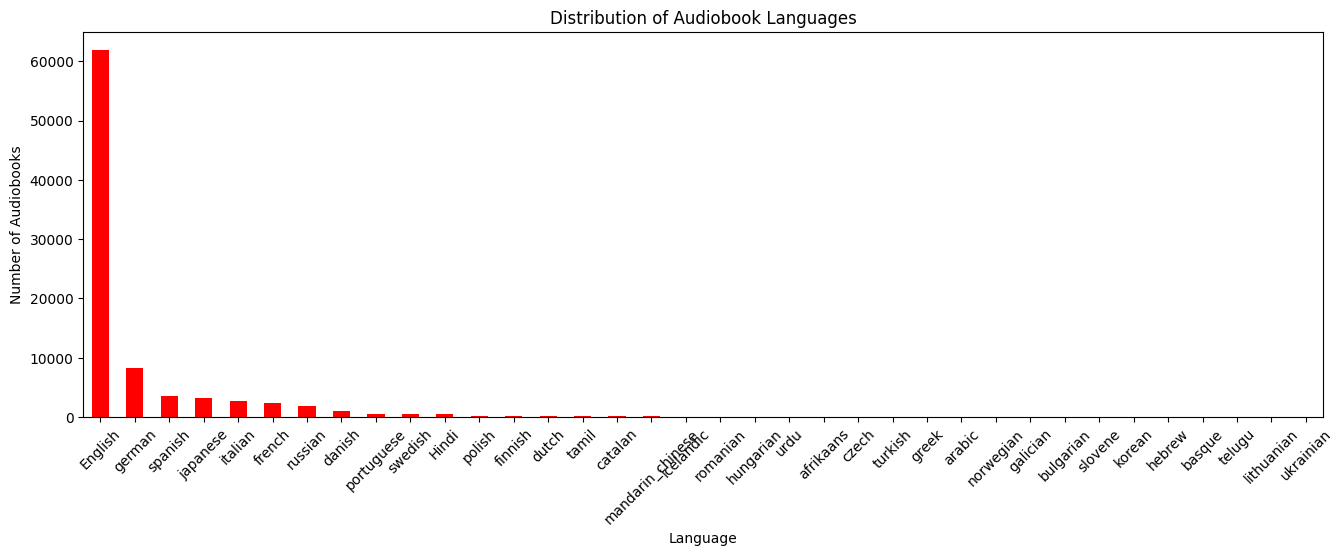

In [66]:
plt.figure(figsize=(16,5))
df['language'].value_counts().plot(kind='bar', color='red')
plt.xlabel('Language')
plt.ylabel('Number of Audiobooks')
plt.title('Distribution of Audiobook Languages')
plt.xticks(rotation=45)
plt.show()


In [45]:
df['author'].value_counts().head(10)


author
矢島雅弘,石橋遊                      874
SmartReading                  405
中西貴之,BJ                       311
div.                          274
OnlineStudioProductions       212
WilliamShakespeare            201
BillBrown                     198
J.M.Gardner                   174
InnovativeLanguageLearning    167
GertrudeChandlerWarner        160
Name: count, dtype: int64

In [46]:
df.head(10)

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,140,2008-04-08,English,5.0,468.00
1,The Burning Maze,RickRiordan,RobbieDaymond,788,2018-01-05,English,4.5,820.00
2,The Deep End,JeffKinney,DanRussell,123,2020-06-11,English,4.5,410.00
3,Daughter of the Deep,RickRiordan,SoneelaNankani,676,2021-05-10,English,4.5,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,600,2010-01-13,English,4.5,820.00
5,The Hunger Games: Special Edition,SuzanneCollins,TatianaMaslany,635,2018-10-30,English,5.0,656.00
6,Quest for the Diamond Sword,WinterMorgan,LukeDaniels,143,2014-11-25,English,5.0,233.00
7,The Dark Prophecy,RickRiordan,RobbieDaymond,752,2017-02-05,English,5.0,820.00
8,Merlin Mission Collection,MaryPopeOsborne,MaryPopeOsborne,656,2017-02-05,English,5.0,1256.00
9,The Tyrant’s Tomb,RickRiordan,RobbieDaymond,802,2019-09-24,English,5.0,820.00


In [47]:
def split_author_name(name):
    return re.sub(r'([a-z])([A-Z])', r'\1 \2', name)

df['author'] = df['author'].apply(split_author_name)


In [48]:
def split_narrator_name(name):
    return re.sub(r'([a-z])([A-Z])', r'\1 \2', name)

df['narrator'] = df['narrator'].apply(split_narrator_name)

In [49]:
df['narrator'].value_counts().head(10)

narrator
anonymous                   1034
矢島雅弘,石橋遊                     874
Intuitive                    465
uncredited                   326
中西貴之,BJ                      311
Book Buddy Digital Media     260
div.                         230
ДмитрийЕвстратов             221
Bill Brown                   198
Sean Pratt                   172
Name: count, dtype: int64

In [50]:
df['price'] = df['price'].replace('Free', 0.00).astype(float)


In [55]:
df['language'] = df['language'].str.capitalize()


In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

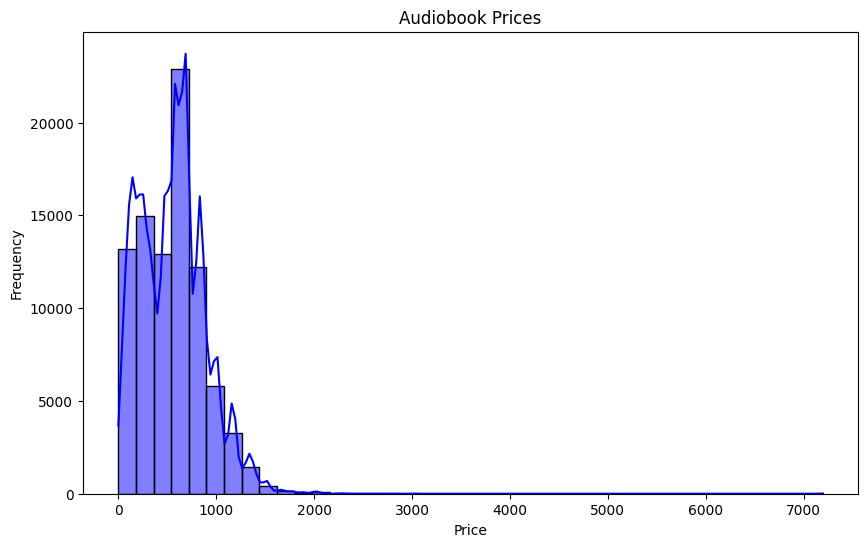

In [71]:
plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=40, kde=True, color='blue')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Audiobook Prices')
plt.show()

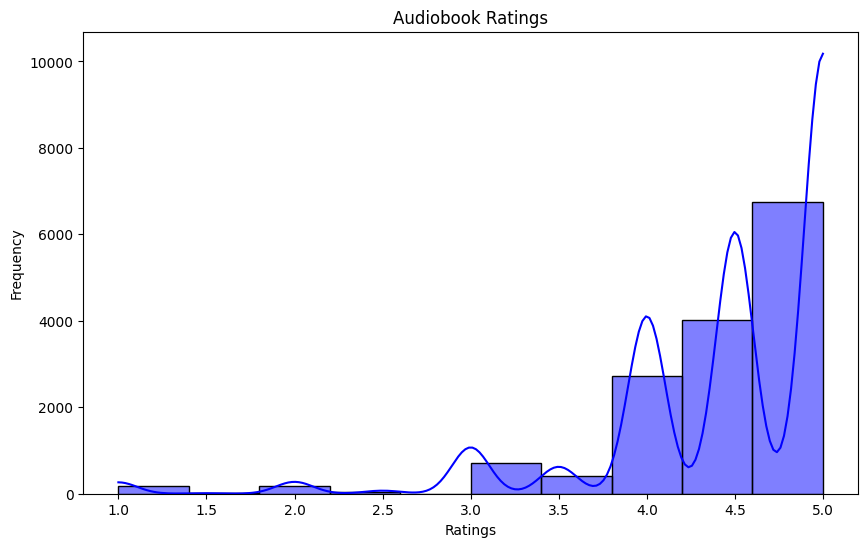

In [72]:
plt.figure(figsize=(10,6))
sns.histplot(df['stars'], bins=10, kde=True, color='blue')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Audiobook Ratings')
plt.show()


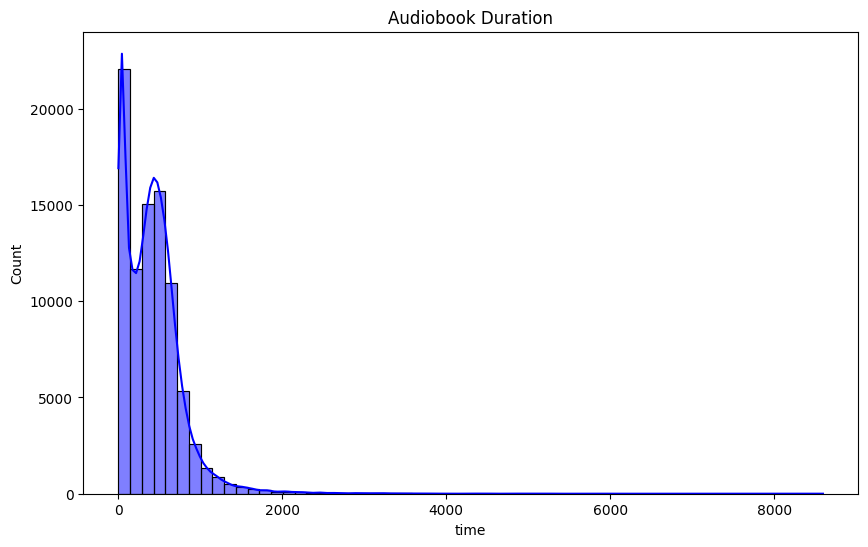

In [73]:
plt.figure(figsize=(10,6))
sns.histplot(data= df, x= 'time', bins=60, kde=True , color='blue')
plt.title('Audiobook Duration')
plt.show()

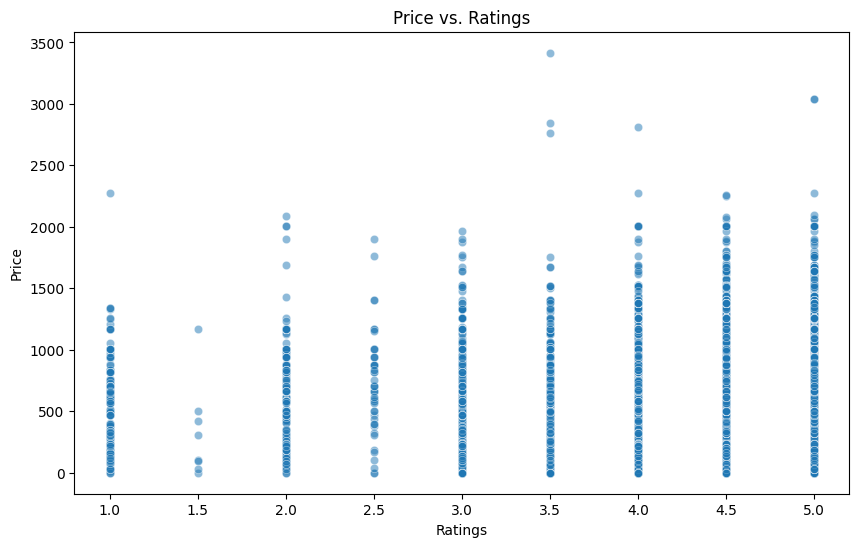

In [74]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['stars'], y=df['price'], alpha=0.5)
plt.xlabel('Ratings')
plt.ylabel('Price')
plt.title('Price vs. Ratings')
plt.show()


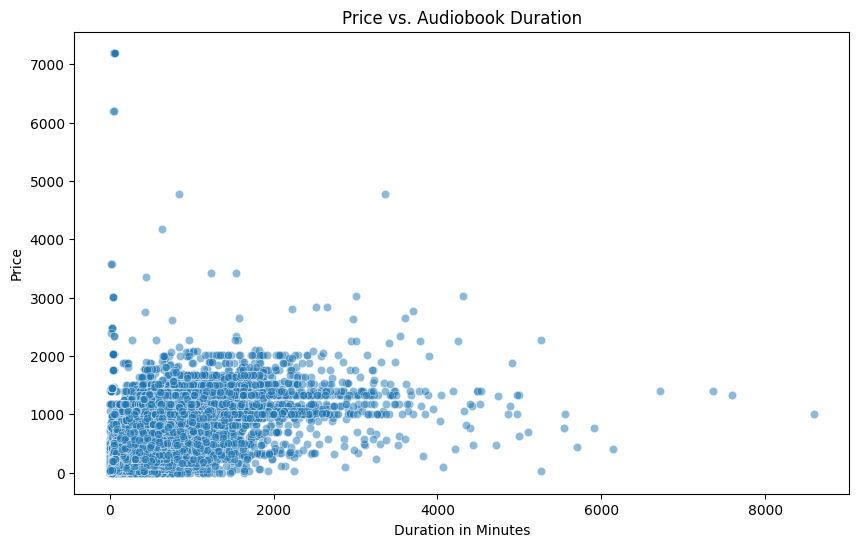

In [75]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['time'], y=df['price'], alpha=0.5)
plt.xlabel('Duration in Minutes')
plt.ylabel('Price')
plt.title('Price vs. Audiobook Duration')
plt.show()


C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30690 (\N{CJK UNIFIED IDEOGRAPH-77E2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23798 (\N{CJK UNIFIED IDEOGRAPH-5CF6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 38597 (\N{CJK UNIFIED IDEOGRAPH-96C5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24344 (\N{CJK UNIFIED IDEOGRAPH-5F18}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170:

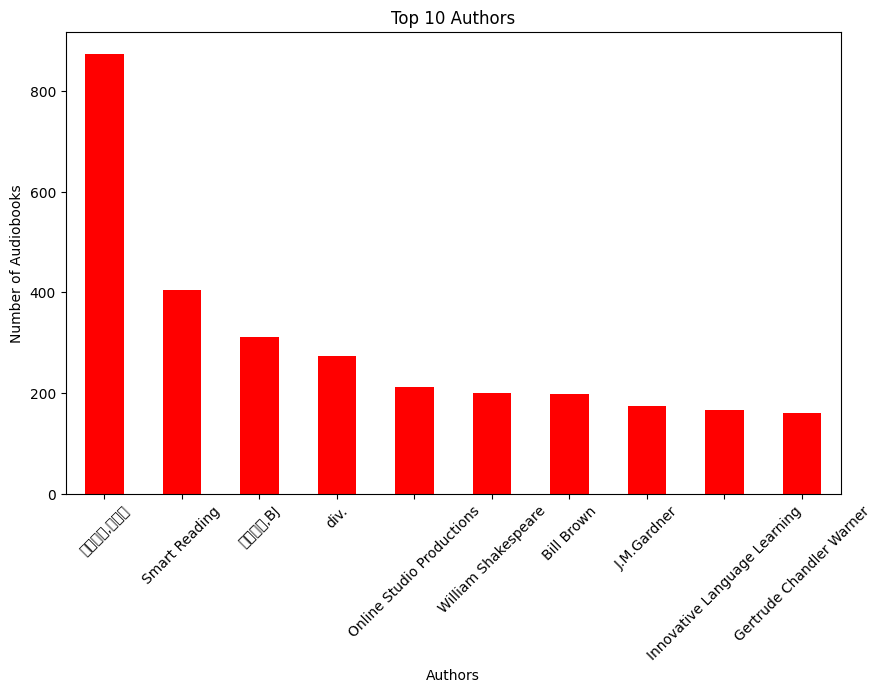

In [78]:
plt.figure(figsize=(10,6))
df['author'].value_counts().nlargest(10).plot(kind='bar', color='red')
plt.xlabel('Authors')
plt.ylabel('Number of Audiobooks')
plt.title('Top 10 Authors')
plt.xticks(rotation=45)
plt.show()


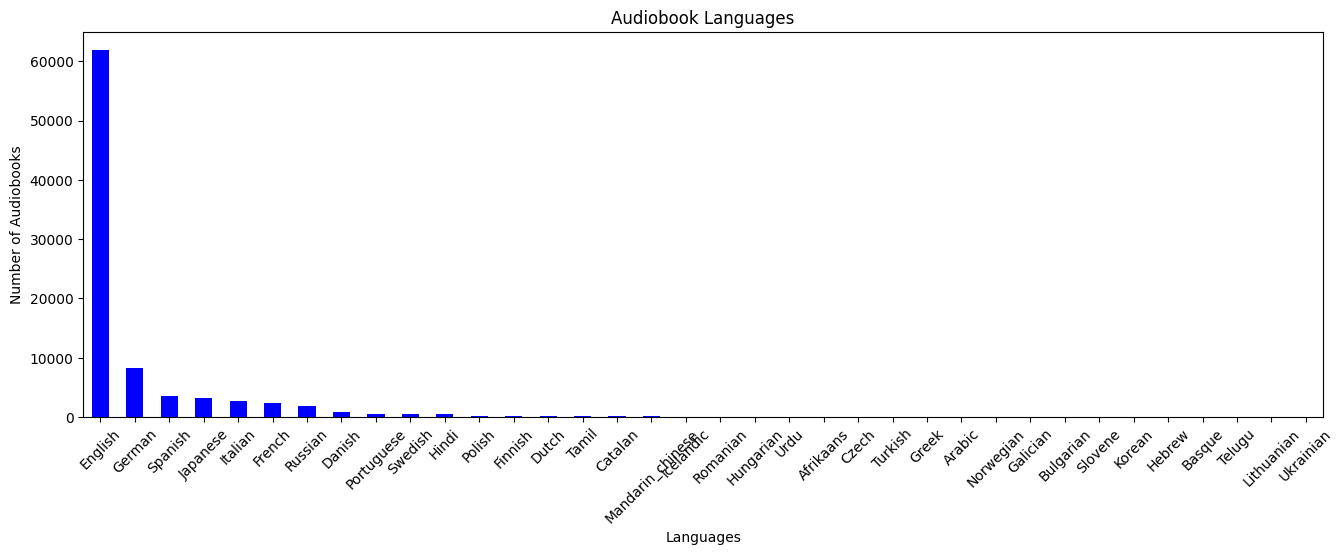

In [79]:
plt.figure(figsize=(16,5))
df['language'].value_counts().plot(kind='bar', color='blue')
plt.xlabel('Languages')
plt.ylabel('Number of Audiobooks')
plt.title('Audiobook Languages')
plt.xticks(rotation=45)
plt.show()
